# Classification
#### - Dividing the dataset into groups (or classes)


- Dataset consists of 2 types of variables
    - Independent variables / features / decsriptors / input (random) variables / covariates / regressor
    - Dependent variables / output / class / target

### Classification vs Clustering
- Availability of Labels vs Non-availability of Labels

# Linear Regression
    
Regression is a method of modelling a target value based on independent variables. 

Linear regression is a method to find the line of best fit given a dataset so that we can predict one variable given the other

$
\begin{align}
y = mx + c
\end{align}
$

where m is the slope, c is the y intercept

## Read the data from input file - Using [Pandas](https://pandas.pydata.org/)

- Generally the data is provided in the tabular format in the form of .csv, .xls or via a database. 
- Pandas is predominantly used for data wrangling and analysis for a dataset in a tabular format 

<img src='img/csv_to_df.png'>

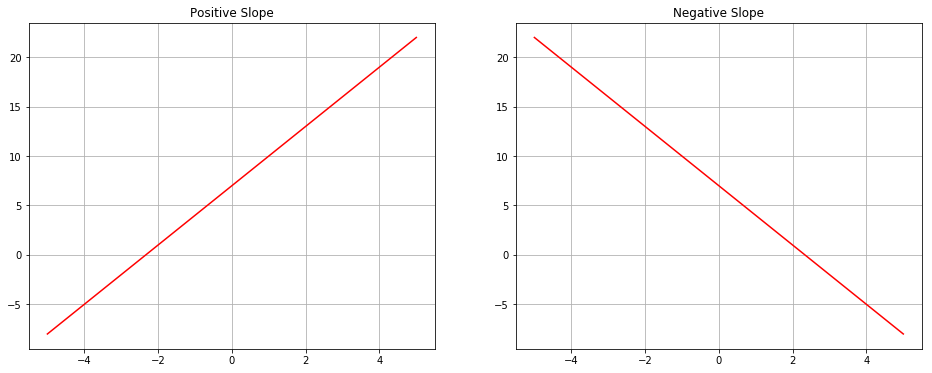

In [5]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16, 6))

m = 3
c = 7

x_vals = [i for i in range(-5, 6)]
y_vals = [m*x_ + c for x_ in x_vals]

ax = fig.gca()
ax.set_xticks(np.arange(min(x_vals)-1, max(x_vals)+1, 1))
ax.set_yticks(np.arange(min(y_vals)-1, max(y_vals)+1, 1))
plt.subplot(1,2,1)
plt.plot(x_vals, y_vals, color='r')
plt.title('Positive Slope')
plt.grid()

m = -3
c = 7

x_vals = [i for i in range(-5, 6)]
y_vals = [m*x_ + c for x_ in x_vals]

ax.set_xticks(np.arange(min(x_vals)-1, max(x_vals)+1, 1))
ax.set_yticks(np.arange(min(y_vals)-1, max(y_vals)+1, 1))
plt.subplot(1,2,2)
plt.plot(x_vals, y_vals, color='r')
plt.title('Negative Slope')
plt.grid()

plt.show()

In [6]:
import pandas as pd
df_data = pd.read_csv('../data/2d_classification.csv')

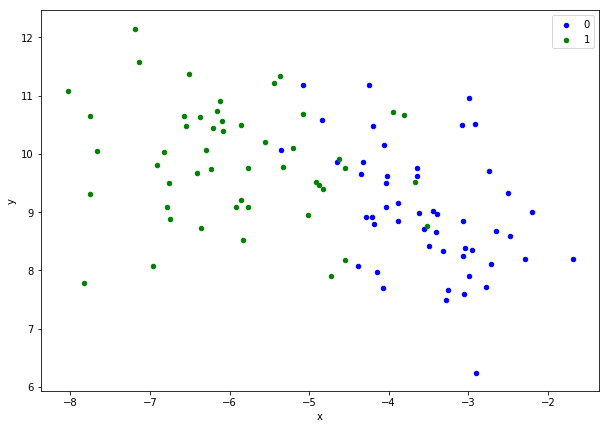

In [7]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7] # Size of the plots

colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}
fig, ax = plt.subplots()
grouped = df_data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

x = df_data[['x']].values
y = df_data[['y']].values

lin_regr = LinearRegression()
lin_regr.fit(x, y)

pred_y = lin_regr.predict(x)

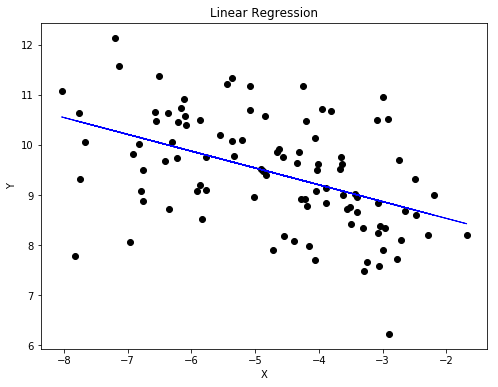

In [9]:
colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}

plt.figure(figsize=(8,6))
plt.scatter(x, y,  color='black')
plt.plot(x, pred_y, color='blue', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

## Components to run an algorithm on sklearn

### Step 1: Instance of the algorithm that is to be used
- Create an instance of the algorithm that could be invoked to use the implemented functions

<font color='blue'> __lin_regr = LinearRegression()__ </font>

### Step 2: Train your data -> Fit function

- What does it do ?
    - It trains on the dataset
- What does it identify ?
    - Coefficients / Weights / Intercepts
- When will it be used ?
    - Use the co-efficients to predict for the new data

<font color='blue'> __lin_regr.fit(x, y)__ </font>


### Step 3: Prediction
- For any new set of data, you can predict using

<font color='blue'> __pred_y = lin_regr.predict(x)__ </font>

### What does your model store ?

#### Coeficients

In [10]:
print('Coefficients:', lin_regr.coef_)

Coefficients: [[-0.33526649]]


#### Intercepts

In [11]:
print('Intercepts:', lin_regr.intercept_)

Intercepts: [7.86368678]


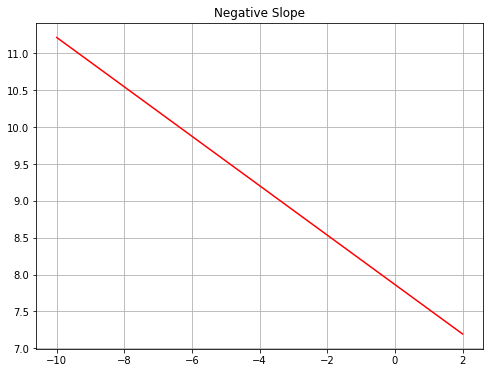

In [12]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))

m = lin_regr.coef_[0]
c = lin_regr.intercept_

x_vals = [i for i in range(-10, 3)]
y_vals = [m*x_ + c for x_ in x_vals]

ax.set_xticks(np.arange(min(x_vals)-1, max(x_vals)+1, 1))
ax.set_yticks(np.arange(min(y_vals)-1, max(y_vals)+1, 1))
plt.subplot(1,1,1)
plt.plot(x_vals, y_vals, color='r')
plt.title('Negative Slope')
plt.grid()

plt.show()

## Metrics

#### Mean Suqared Error

In [13]:
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f' % mean_squared_error(y, pred_y))

Mean squared error: 0.95


#### R^2 Score
- proportion of the variance in the dependent variable(target/label) that is predictable from the independent variables(features)

In [14]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y, pred_y))

Variance score: 0.22


### Another example

<class 'numpy.ndarray'>
(100, 1)


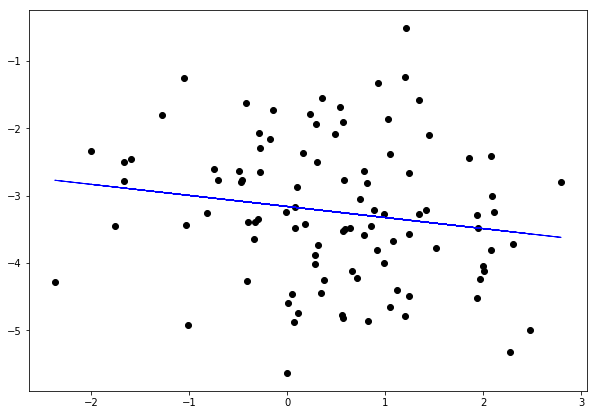

In [15]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# Creating data
data, label = make_blobs(n_samples=100, centers=1, n_features=2)
df_data = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=label)) # converting it into dataframe to make it easier

# Making them easy to read
x = df_data[['x']].values
y = df_data[['y']].values

print(type(x))
print(x.shape)
# Prediction
lin_regr = LinearRegression()
lin_regr.fit(x, y)
pred_y = lin_regr.predict(x)

# Plotting the results
plt.figure()
plt.scatter(x, y,  color='black')
plt.plot(x, pred_y, color='blue', linewidth=1)
plt.show()

### Restrictions of Linear Regression

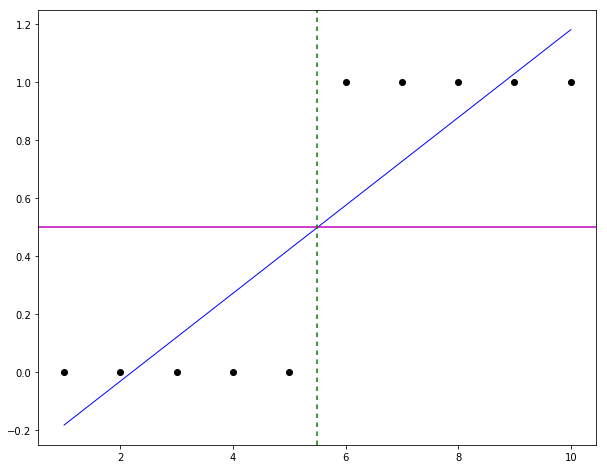

In [16]:
from matplotlib import pyplot as plt


data = np.array([[1,0], [2,0], [3,0], [4,0], [5,0], [6,1], [7,1], [8,1], [9,1], [10, 1]])

x = np.reshape(data[:, 0], (data.shape[0], 1))
y =  np.reshape(data[:, 1], (data.shape[0], 1))

# Prediction
lin_regr = LinearRegression()
lin_regr.fit(x, y)
pred_y = lin_regr.predict(x)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(x, y,  color='black')
plt.plot(x, pred_y, color='blue', linewidth=1)
plt.axhline(y=0.5, xmin=0, xmax=1, color='m')
plt.axvline(x=5.5, ymin=0, ymax=1, color='g', dashes=[3,3])
plt.show()

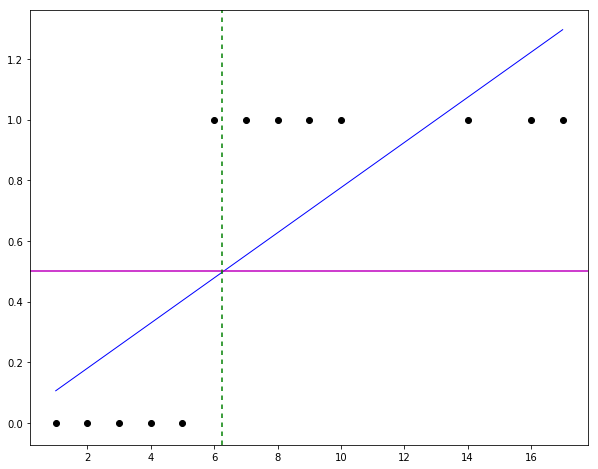

In [17]:
from matplotlib import pyplot as plt


data = np.array([[1,0], [2,0], [3,0], [4,0], [5,0], [6,1], [7,1], [8,1], [9,1], [10, 1], [14, 1], [16,1], [17, 1]])

x = np.reshape(data[:, 0], (data.shape[0], 1))
y =  np.reshape(data[:, 1], (data.shape[0], 1))

# Prediction
lin_regr = LinearRegression()
lin_regr.fit(x, y)
pred_y = lin_regr.predict(x)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(x, y,  color='black')
plt.plot(x, pred_y, color='blue', linewidth=1)
plt.axhline(y=0.5, xmin=0, xmax=1, color='m')
plt.axvline(x=6.25, ymin=0, ymax=1, color='g', dashes=[3,3])
plt.show()